<a href="https://colab.research.google.com/github/LSDtopotools/lsdtt_notebooks/blob/master/lsdtopotools/legacy_startup_for_historic_purposes_only/lsdtopotools_on_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The full lsdtt stack on colab (LEGACY ONLY!)

**This is a legacy notebook, only for enthusiasts that want to install miniconda on their colab environment!**

**A much better way to install `lsdtopotools` is to use the condacolab package!**

**Please see the `lsdtopotoolsd_with_condacolab.ipynb` notebook.**

If you execute the cells in this notebook, you will have a working copy of *lsdtopotools* (https://lsdtopotools.github.io/LSDTT_documentation/) which includes our visualisation tools and our command line tools. 

This document was last updated by Simon M. Mudd on 10/09/2021

If you use this software for your research, please cite doi:10.5281/zenodo.4577879 (https://zenodo.org/record/4577879#.YFNm8q_7Q2w)

More example notebooks can be found here: https://github.com/LSDtopotools/lsdtt_notebooks and here: https://github.com/simon-m-mudd/smm_teaching_notebooks but for those notebooks to work in colab you will need to run the below installation cells beforehand. 

## First install the python tools

We first install lsdviztools. This step takes about 45 seconds. 

In [1]:
!pip install lsdviztools &> /dev/null

## Now for the lsdtt command line tools

First we download miniconda, which takes about 30 seconds. We need this to install other parts of the software

This is an old version with miniconda

In [ ]:
%%bash
MINICONDA_INSTALLER_SCRIPT=Miniconda3-py37_4.8.2-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.anaconda.com/miniconda/$MINICONDA_INSTALLER_SCRIPT &> /dev/null
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX &> /dev/null

This is a test for miniforge

In [2]:
%%bash
MINICONDA_INSTALLER_SCRIPT=Mambaforge-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://github.com/conda-forge/miniforge/releases/latest/download/Mambaforge-Linux-x86_64.sh &> /dev/null
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX &> /dev/null

In [8]:
!mamba install -y lsdtopotools &> /dev/null

The next step is to set the conda channels, install mamba (because it installs *lsdtopotools* much faster than conda) and then finally lsdtopotools. This takes ~3.5 minutes. 

In [ ]:
!conda config --add channels conda-forge &> /dev/null
!conda config --set channel_priority strict &> /dev/null
!conda install -c conda-forge -y mamba &> /dev/null
!mamba install -c conda-forge -y lsdtopotools &> /dev/null

## Test to see if it worked

Now we perform some tests to see if it all worked. First we try to import some packages for visualisation. 

In [4]:
import lsdviztools.lsdbasemaptools as bmt
from lsdviztools.lsdplottingtools import lsdmap_gdalio as gio
import lsdviztools.lsdmapwrappers as lsdmw

Now we download some data that we will look at using *lsdviztools*. 

In [5]:
import lsdviztools.lsdbasemaptools as bmt
from lsdviztools.lsdplottingtools import lsdmap_gdalio as gio

# YOU NEED TO PUT YOUR API KEY IN A FILE
your_OT_api_key_file = "my_OT_api_key.txt"

with open(your_OT_api_key_file, 'r') as file:
    print("I am reading you OT API key from the file "+your_OT_api_key_file)
    api_key = file.read().rstrip()
    print("Your api key starts with: "+api_key[0:4])

Dataset_prefix = "Xian"
source_name = "COP30"

Xian_DEM = bmt.ot_scraper(source = source_name,
                        lower_left_coordinates = [33.672715066202954, 107.54480443333152], 
                        upper_right_coordinates = [34.16323953210814, 109.4363649228437],
                        prefix = Dataset_prefix, 
                        api_key_file = your_OT_api_key_file)
Xian_DEM.print_parameters()
Xian_DEM.download_pythonic()
DataDirectory = "./"
Fname = Dataset_prefix+"_"+source_name+".tif"
gio.convert4lsdtt(DataDirectory,Fname)

I am reading you OT API key from the file my_OT_api_key.txt
Your api key starts with: 9515
I am taking your coordinates from the lower left list
I am taking your coordinates from the upper right list
I am reading you OT API key from the file my_OT_api_key.txt
The source is: COP30
The west longitude is: 107.54480443333152
The east longitude is: 109.4363649228437
The south latitude is: 34.16323953210814
The north latitude is: 33.672715066202954
The path is: ./
The prefix is: Xian
The resolution is: 30
I am going to download the following for you:
https://portal.opentopography.org/API/globaldem?demtype=COP30&south=33.672715066202954&north=34.16323953210814&west=107.54480443333152&east=109.4363649228437&outputFormat=GTiff&API_Key=951579bc84bc38a5894d4d43750aac09
This might take a little while, depending on the size of the file. 
The filename will be:
./Xian_COP30.tif
The path and file without path are:
./  Xian_COP30.tif
Finished downloading
The projections is:
GEOGCS["WGS 84",DATUM["WGS_1

'Xian_COP30_UTM.bil'

In [6]:
lsdtt_parameters = {"write_hillshade" : "true",  
                    "surface_fitting_radius" : "60",
                    "print_slope" : "true"}
r_prefix = Dataset_prefix+"_COP30_UTM"
w_prefix = Dataset_prefix+"_COP30_UTM"
lsdtt_drive = lsdmw.lsdtt_driver(read_prefix = r_prefix,
                                 write_prefix= w_prefix,
                                 read_path = "./",
                                 write_path = "./",
                                 parameter_dictionary=lsdtt_parameters)
lsdtt_drive.print_parameters()
lsdtt_drive.run_lsdtt_command_line_tool()

The lsdtopotools command line tools available are: 
['lsdtt-basic-metrics', 'lsdtt-channel-extraction', 'lsdtt-chi-mapping', 'lsdtt-cosmo-tool', 'lsdtt-hillslope-channel-coupling', 'lsdtt-valley-metrics']
Testing has been done against lsdtopotools v0.7
The command line tool is: lsdtt-basic-metrics
The driver name is: Test_01
The read path is: ./
The write path is: ./
The read prefix is: Xian_COP30_UTM
The write prefix is: Xian_COP30_UTM
The parameter dictionary is:
{'write_hillshade': 'true', 'surface_fitting_radius': '60', 'print_slope': 'true'}
Done writing the driver file
I've finised writing the driver file. Let me run LSDTT for you.


Your colourbar will be located: right
xsize: 5895 and y size: 2013
NoData is: -9999.0
Yoyoyoyo the EPSG is :EPSG:32648
EPSG:32648
The EPSGString is: EPSG:32648
minimum values are x: 734577.0 and y: 3728795.0
I made the ticks.
x labels are: 
['760', '790', '820', '850', '880', '910']
x locations are:
[760000.0, 790000.0, 820000.0, 850000.0, 880000.0, 910000.0]
y labels are: 
['3750', '3780']
y locations are:
[3750000.0, 3780000.0]
This colourmap is: gray


/usr/local/lib/python3.9/dist-packages/lsdviztools/lsdmapfigure/plottingraster.py:453: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(self.tick_x_labels)
/usr/local/lib/python3.9/dist-packages/lsdviztools/lsdmapfigure/plottingraster.py:454: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.tick_y_labels)


The number of axes are: 1
Axes(0,0;1x1)
Axes(0,0;1x1)
N axes are: 1
Axes(0,0;1x1)
xsize: 5895 and y size: 2013
NoData is: -9999.0
Yoyoyoyo the EPSG is :EPSG:32648
EPSG:32648
The EPSGString is: EPSG:32648
I am going to use the normalisation None
I am using the full range of values in the raster.
The number of axes are: 2
The aspect ratio is: 2.9284649776453056
I need to adjust the spacing of the colourbar.
You have a colourbar on the left or right, I need to check the number of characters in the labels.
['', '', '', '', '']
The longest colourbar label has 0 characters.
The cbar characters are: 0 and the cbar text width is: 0.4
cbar_left: 5.449999999999999 map left: 0.8500000000000001
cbar_bottom: 0.65 map bottom: 0.65
The figure size is: 
[6.25, 2.3866412213740458]
Map axes are:
[0.136, 0.27234927234927236, 0.72, 0.6438509515432592]
cbar_axes are:
[0.8719999999999999, 0.27234927234927236, 0.032, 0.6438509515432592]
Number of axes are: 2
I'm returning:
Figure(450x171.838)


<Figure size 432x288 with 0 Axes>

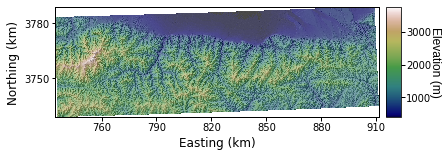

In [7]:
%matplotlib inline
Base_file = Dataset_prefix+"_COP30_UTM"
this_img = lsdmw.SimpleHillshade(DataDirectory,Base_file,cmap="gist_earth", save_fig=False, size_format="geomorphology")

## If you want to install lsdtopytools

*lsdtopytools* is another part of the *lsdtopotools* stack. You need to install it with mamba. This takes about 45 seconds. 

In [ ]:
!mamba install -c conda-forge -y lsdtopytools &> /dev/null